In [1]:
import numpy as np

In [5]:
!type 2D_example.csv

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602


In [6]:
with open('2D_example.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-3.269730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-2.931415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,7.582103
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,-6.029489,-1.831199
0,1.116025,3.353602



In [7]:
data = np.loadtxt("2D_example.csv", delimiter=",")

In [8]:
y = data[:,0].astype(int)

In [9]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [10]:
X = data[:,1:3]

In [11]:
X

array([[-7.428476,  1.509903],
       [ 2.980693,  1.960821],
       [ 3.988255,  4.636389],
       [-5.789437, -4.621614],
       [-4.894447, -3.26973 ],
       [-1.933949, -0.047276],
       [-1.611771,  5.932201],
       [-6.670152, -1.036282],
       [-2.931415, -0.104475],
       [-0.074762,  1.070002],
       [-2.691793,  4.168774],
       [ 0.461182,  3.453438],
       [-1.354135,  3.751657],
       [-6.229476, -1.209434],
       [ 2.778594,  7.582103],
       [-5.719578, -0.243509],
       [ 0.928322,  3.20852 ],
       [ 0.850475,  2.908955],
       [-6.029489, -1.831199],
       [ 1.116025,  3.353602]])

In [12]:
X[:,0]

array([-7.428476,  2.980693,  3.988255, -5.789437, -4.894447, -1.933949,
       -1.611771, -6.670152, -2.931415, -0.074762, -2.691793,  0.461182,
       -1.354135, -6.229476,  2.778594, -5.719578,  0.928322,  0.850475,
       -6.029489,  1.116025])

In [13]:
X[:, 1]

array([ 1.509903,  1.960821,  4.636389, -4.621614, -3.26973 , -0.047276,
        5.932201, -1.036282, -0.104475,  1.070002,  4.168774,  3.453438,
        3.751657, -1.209434,  7.582103, -0.243509,  3.20852 ,  2.908955,
       -1.831199,  3.353602])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

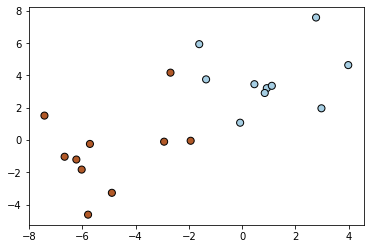

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [24]:
def plotBoundary(X, clf, mesh=True, boundary=True, n_neigbors=1):
    
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])
    
    XX, YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    
    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10)
        
    if boundary:
        plt.contour(XX, YY, Z,
                    colors='k', linestyles='-', levels=[0.5])
        
    plt.xlim(x_min,y_max)
    plt.ylim(y_min, y_max)

In [25]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

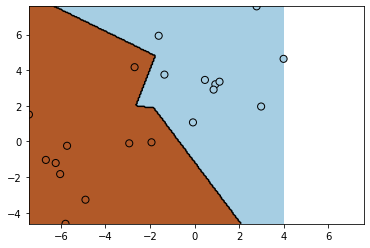

In [26]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf)

In [28]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')

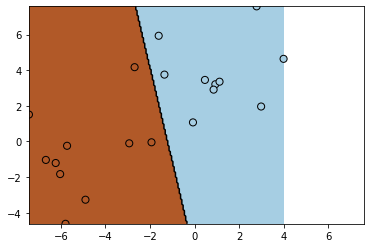

In [29]:
clf.fit(X,y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf)

In [30]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma='auto')

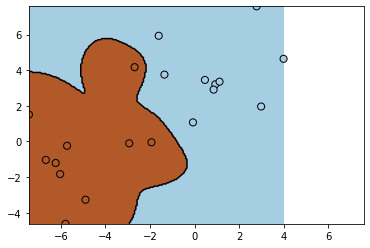

In [31]:
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],marker='o', s=50, c=y,edgecolors='k')

plotBoundary(X,clf)